In [368]:
!pip install mlrose-hiive
%load_ext autoreload
%autoreload 2

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
mlr_data = '/tf/data/mlrose/'
mlr_src = '../'
!ls $mlr_src
!ls $mlr_data

Constants.py   Graph.py   __pycache__  kcolors	  nqueens
Experiment.py  README.md  jupyter      notes.txt  tsp
__pycache__  kcolors  nqueens


In [853]:

import mlrose_hiive
import numpy as np
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
import sys
import os


sys.path.insert(0, mlr_src)
from Graph import *
from Experiment import *

In [291]:
'''
███████╗░█████╗░██╗░░░██╗██████╗░██████╗░███████╗░█████╗░██╗░░██╗
██╔════╝██╔══██╗██║░░░██║██╔══██╗██╔══██╗██╔════╝██╔══██╗██║░██╔╝
█████╗░░██║░░██║██║░░░██║██████╔╝██████╔╝█████╗░░███████║█████═╝░
██╔══╝░░██║░░██║██║░░░██║██╔══██╗██╔═══╝░██╔══╝░░██╔══██║██╔═██╗░
██║░░░░░╚█████╔╝╚██████╔╝██║░░██║██║░░░░░███████╗██║░░██║██║░╚██╗
╚═╝░░░░░░╚════╝░░╚═════╝░╚═╝░░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝╚═╝░░╚═╝
'''
!ls $mlr_src/4peaks
!ls $mlr_data/4peaks

__pycache__  run.py
pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


sa_size40_schgeom_m100|best_fit:75.0|best_it:883|time_to_best:0.07979|fevals_to_best:1169.0|fevals:1269.0
sa_size80_schgeom_m100|best_fit:78.0|best_it:2430|time_to_best:0.58817|fevals_to_best:3728.0|fevals:3828.0
sa_size100_schgeom_m100|best_fit:100.0|best_it:3611|time_to_best:1.16622|fevals_to_best:5464.0|fevals:5564.0


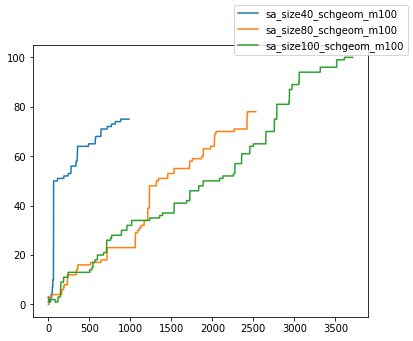

In [855]:
sa = Experiment.pickle_load(os.path.join(mlr_data, '4peaks','pickle_sa.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',100))
s.filters.append(TagFilter('sch','geom'))
graph_generate_single(sa, search=s)
# sa.results
table_summary_single(sa, search=s)


to_chart['sa'] = s.findall(sa)

ga_size40_pop100_m100_mut0.1|best_fit:75.0|best_it:35|time_to_best:0.1493|fevals_to_best:3748.0|fevals:13848.0
ga_size80_pop100_m100_mut0.1|best_fit:151.0|best_it:477|time_to_best:2.76092|fevals_to_best:48413.0|fevals:58513.0
ga_size100_pop100_m100_mut0.1|best_fit:176.0|best_it:654|time_to_best:3.46046|fevals_to_best:66294.0|fevals:76394.0


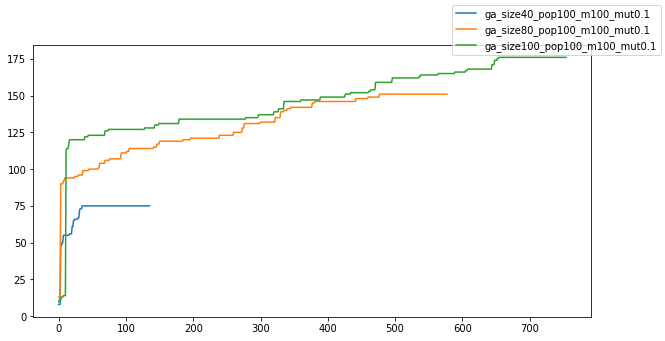

In [856]:
ga = Experiment.pickle_load(os.path.join(mlr_data, '4peaks','pickle_ga.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',100))
s.filters.append(TagFilter('mut',0.1))
s.filters.append(TagFilter('pop',100))
# s.filters.append(TagFilter('minelite',0))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)
to_chart['ga'] = s.findall(ga)

mim_size40_pop200_m100_kp0.25|best_fit:75.0|best_it:17|time_to_best:5.33123|fevals_to_best:3830.0|fevals:23930.0
mim_size80_pop200_m100_kp0.25|best_fit:98.0|best_it:6|time_to_best:7.61086|fevals_to_best:1612.0|fevals:21712.0
mim_size100_pop200_m100_kp0.25|best_fit:127.0|best_it:23|time_to_best:43.75476|fevals_to_best:5032.0|fevals:25132.0


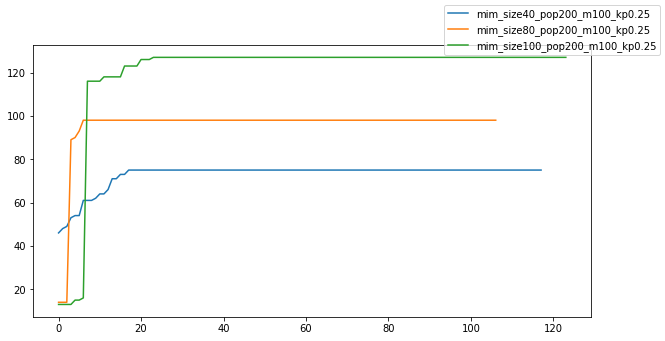

In [857]:
mim = Experiment.pickle_load(os.path.join(mlr_data, '4peaks','pickle_mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',100))
s.filters.append(TagFilter('pop',200))
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)
to_chart['mim'] = s.findall(mim)

rhc_size80_r20_m100|best_fit:25.0|best_it:345|time_to_best:1.13952|fevals_to_best:1979.0|fevals:2079.0
rhc_size100_r20_m100|best_fit:20.0|best_it:441|time_to_best:1.22624|fevals_to_best:640.0|fevals:740.0
rhc_size40_r20_m100|best_fit:75.0|best_it:469|time_to_best:4.26584|fevals_to_best:3224.0|fevals:3324.0


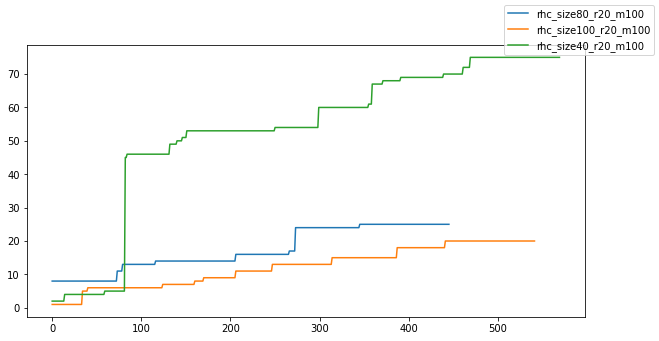

In [858]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, '4peaks','pickle_rhc.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',100))
s.filters.append(TagFilter('r',20))
graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)
to_chart['rhc'] = s.findall(rhc)

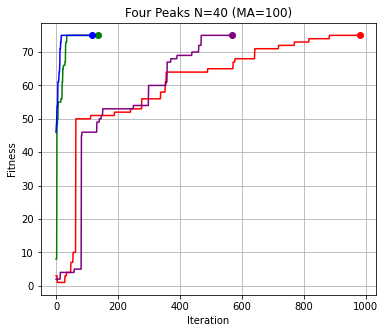

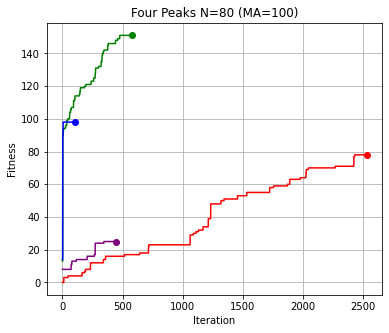

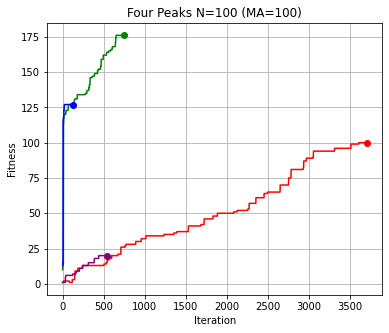

In [859]:
plt.rcParams["figure.figsize"] = (6,5)
for n in [40,80,100]:
    graph_generate_summary(to_chart, f'Four Peaks N={n} (MA=100)','Iteration','Fitness', size=n)


In [774]:
'''

███████╗██╗░░░░░██╗██████╗░███████╗██╗░░░░░░█████╗░██████╗░
██╔════╝██║░░░░░██║██╔══██╗██╔════╝██║░░░░░██╔══██╗██╔══██╗
█████╗░░██║░░░░░██║██████╔╝█████╗░░██║░░░░░██║░░██║██████╔╝
██╔══╝░░██║░░░░░██║██╔═══╝░██╔══╝░░██║░░░░░██║░░██║██╔═══╝░
██║░░░░░███████╗██║██║░░░░░██║░░░░░███████╗╚█████╔╝██║░░░░░
╚═╝░░░░░╚══════╝╚═╝╚═╝░░░░░╚═╝░░░░░╚══════╝░╚════╝░╚═╝░░░░░
'''

!ls $mlr_src/flipflop
!ls $mlr_data/flipflop
pickle='pickle_L'

__pycache__  run.py
pickle_Bsa.p  pickle_Lmim.p  pickle_Lsa.p  pickle_mim.p  pickle_sa.p
pickle_Lga.p  pickle_Lrhc.p  pickle_ga.p   pickle_rhc.p


sa_size32_schgeom_m1000|best_fit:31.0|best_it:896|time_to_best:0.23341|fevals_to_best:1021.0|fevals:2021.0
sa_size64_schgeom_m1000|best_fit:62.0|best_it:1210|time_to_best:1.42998|fevals_to_best:1438.0|fevals:10474.0
sa_size128_schgeom_m1000|best_fit:123.0|best_it:6219|time_to_best:7.36007|fevals_to_best:7141.0|fevals:11157.0

 [sa_size32_schgeom_m1000|best_fit:31.0|best_it:896|time_to_best:0.23341|fevals_to_best:1021.0|fevals:2021.0, sa_size64_schgeom_m1000|best_fit:62.0|best_it:1210|time_to_best:1.42998|fevals_to_best:1438.0|fevals:10474.0, sa_size128_schgeom_m1000|best_fit:123.0|best_it:6219|time_to_best:7.36007|fevals_to_best:7141.0|fevals:11157.0]


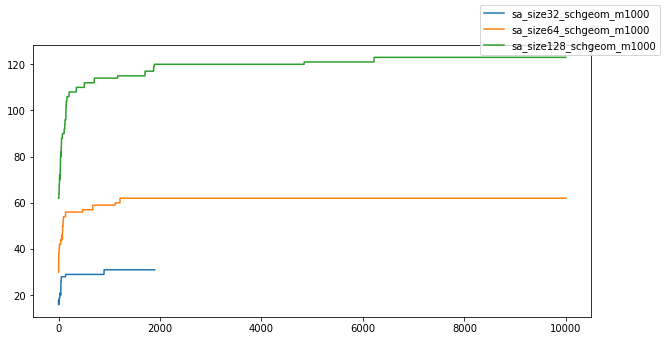

In [789]:
sa = Experiment.pickle_load(os.path.join(mlr_data, 'flipflop',pickle+'sa.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('m',10))
s.filters.append(TagFilter('sch','geom'))
graph_generate_single(sa, search=s)
# sa.results
table_summary_single(sa, search=s)
best = Search()
best.filters.append(TagFilter('sch','geom'))
# best.filters.append(TagFilter('m', 10))
# best.filters.append(TagFilter('size', ))
to_chart['sa'] = best.findall(sa)
print('\n',best.findall(sa))

ga_size32_pop200_m1000_mut0.1|best_fit:31.0|best_it:21|time_to_best:0.12037|fevals_to_best:31.0|fevals:1031.0
ga_size64_pop200_m1000_mut0.1|best_fit:61.0|best_it:45|time_to_best:0.27616|fevals_to_best:61.0|fevals:1061.0
ga_size128_pop200_m1000_mut0.1|best_fit:119.0|best_it:896|time_to_best:4.70703|fevals_to_best:926.0|fevals:1926.0

 [ga_size32_pop200_m1000_mut0.1|best_fit:31.0|best_it:21|time_to_best:0.12037|fevals_to_best:31.0|fevals:1031.0, ga_size64_pop200_m1000_mut0.1|best_fit:61.0|best_it:45|time_to_best:0.27616|fevals_to_best:61.0|fevals:1061.0, ga_size128_pop200_m1000_mut0.1|best_fit:119.0|best_it:896|time_to_best:4.70703|fevals_to_best:926.0|fevals:1926.0]


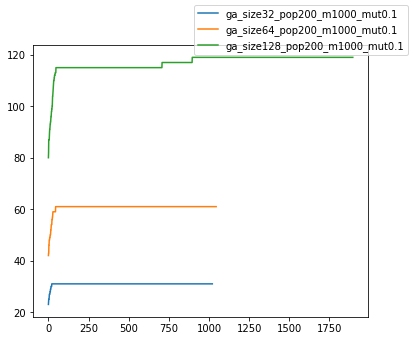

In [795]:
ga = Experiment.pickle_load(os.path.join(mlr_data, 'flipflop',pickle+'ga.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',32))
s.filters.append(TagFilter('mut',0.1))
s.filters.append(TagFilter('pop',200))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)

best = Search()
best.filters.append(TagFilter('pop',200))
best.filters.append(TagFilter('mut', 0.1))

to_chart['ga'] = best.findall(ga)
print('\n',best.findall(ga))

mim_size32_pop200_m1000_kp0.25|best_fit:30.0|best_it:4|time_to_best:0.50349|fevals_to_best:10.0|fevals:1010.0
mim_size64_pop200_m1000_kp0.25|best_fit:56.0|best_it:8|time_to_best:3.90554|fevals_to_best:17.0|fevals:1017.0
mim_size128_pop200_m1000_kp0.25|best_fit:112.0|best_it:16|time_to_best:30.60661|fevals_to_best:29.0|fevals:1029.0

 [mim_size32_pop200_m1000_kp0.25|best_fit:30.0|best_it:4|time_to_best:0.50349|fevals_to_best:10.0|fevals:1010.0, mim_size64_pop200_m1000_kp0.25|best_fit:56.0|best_it:8|time_to_best:3.90554|fevals_to_best:17.0|fevals:1017.0, mim_size128_pop200_m1000_kp0.25|best_fit:112.0|best_it:16|time_to_best:30.60661|fevals_to_best:29.0|fevals:1029.0]


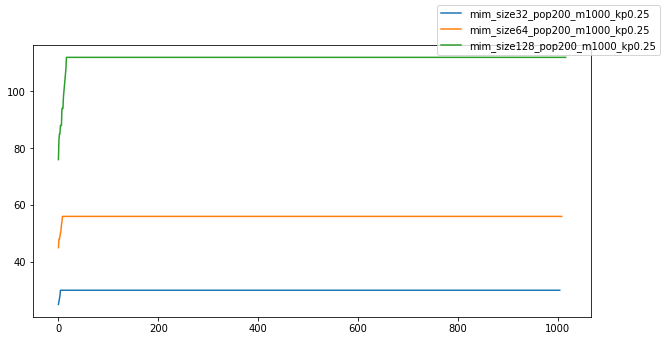

In [778]:
mim = Experiment.pickle_load(os.path.join(mlr_data, 'flipflop',pickle+'mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',128))
s.filters.append(TagFilter('pop',200))
s.filters.append(TagFilter('kp',.25))
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)

best = Search()
best.filters.append(TagFilter('pop',200))
best.filters.append(TagFilter('kp', 0.25))

to_chart['mim'] = best.findall(mim)
print('\n',best.findall(mim))


rhc_size32_r20_m1000|best_fit:29.0|best_it:93|time_to_best:3.92532|fevals_to_best:103.0|fevals:1103.0
rhc_size64_r20_m1000|best_fit:58.0|best_it:151|time_to_best:7.24084|fevals_to_best:14498.0|fevals:15498.0
rhc_size128_r20_m1000|best_fit:108.0|best_it:633|time_to_best:30.36323|fevals_to_best:20638.0|fevals:21638.0

 [rhc_size32_r20_m1000|best_fit:29.0|best_it:93|time_to_best:3.92532|fevals_to_best:103.0|fevals:1103.0, rhc_size64_r20_m1000|best_fit:58.0|best_it:151|time_to_best:7.24084|fevals_to_best:14498.0|fevals:15498.0, rhc_size128_r20_m1000|best_fit:108.0|best_it:633|time_to_best:30.36323|fevals_to_best:20638.0|fevals:21638.0]


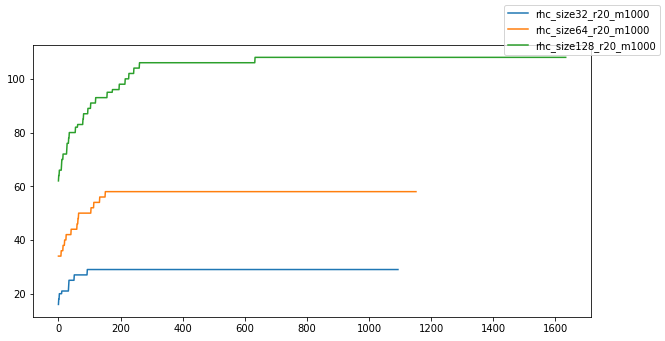

In [779]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, 'flipflop',pickle+'rhc.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',128))
# s.filters.append(TagFilter('pop',200))
s.filters.append(TagFilter('r',20,'eq'))
graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)

best = Search()
# best.filters.append(TagFilter('sch','geom'))
best.filters.append(TagFilter('r',20,'eq'))


to_chart['rhc'] = best.findall(rhc)
print('\n',best.findall(rhc))

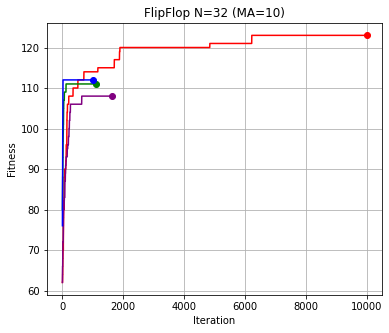

In [784]:
plt.rcParams["figure.figsize"] = (6,5)
    
graph_generate_summary(to_chart, 'FlipFlop N=32 (MA=10)','Iteration','Fitness', size=128)


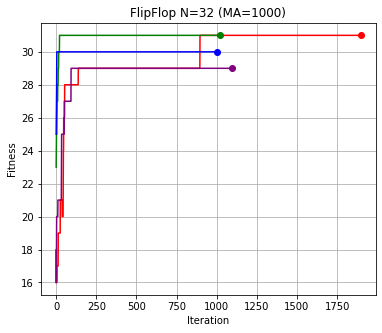

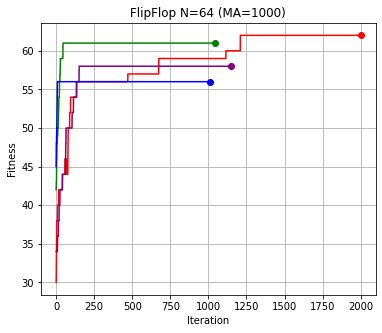

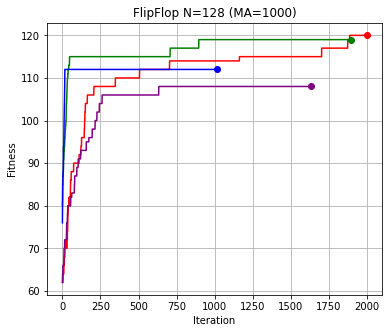

In [796]:
plt.rcParams["figure.figsize"] = (6,5)
for n in [32,64,128]:
    graph_generate_summary(to_chart, f'FlipFlop N={n} (MA=1000)','Iteration','Fitness', size=n, max_x=2000)

In [809]:
'''

██╗░░██╗███╗░░██╗░█████╗░██████╗░░██████╗░█████╗░░█████╗░██╗░░██╗
██║░██╔╝████╗░██║██╔══██╗██╔══██╗██╔════╝██╔══██╗██╔══██╗██║░██╔╝
█████═╝░██╔██╗██║███████║██████╔╝╚█████╗░███████║██║░░╚═╝█████═╝░
██╔═██╗░██║╚████║██╔══██║██╔═══╝░░╚═══██╗██╔══██║██║░░██╗██╔═██╗░
██║░╚██╗██║░╚███║██║░░██║██║░░░░░██████╔╝██║░░██║╚█████╔╝██║░╚██╗
╚═╝░░╚═╝╚═╝░░╚══╝╚═╝░░╚═╝╚═╝░░░░░╚═════╝░╚═╝░░╚═╝░╚════╝░╚═╝░░╚═╝
'''

exp='knapsack'
pickle='pickle_2'

sa_size5_schgeom_m1000|best_fit:188.0|best_it:7|time_to_best:0.0011|fevals_to_best:10.0|fevals:1010.0
sa_size10_schgeom_m1000|best_fit:620.0|best_it:32|time_to_best:0.00566|fevals_to_best:41.0|fevals:1041.0
sa_size15_schgeom_m1000|best_fit:1441.0|best_it:233|time_to_best:0.06127|fevals_to_best:253.0|fevals:1253.0
sa_size25_schgeom_m1000|best_fit:3868.0|best_it:509|time_to_best:0.15842|fevals_to_best:549.0|fevals:1549.0


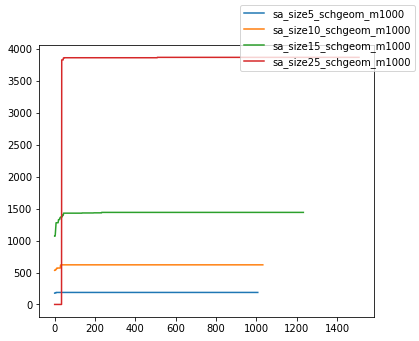

In [819]:
sa = Experiment.pickle_load(os.path.join(mlr_data, exp ,pickle+'sa.p'))
#graph it. 
s = Search()
s.filters.append(TagFilter('m',1000))
s.filters.append(TagFilter('sch','geom'))
graph_generate_single(sa, search=s)
# sa.results
table_summary_single(sa, search=s)

best = Search()
best.filters.append(TagFilter('sch','geom'))
best.filters.append(TagFilter('m', 1000))
# best.filters.append(TagFilter('size', ))
to_chart['sa'] = best.findall(sa)


ga_size5_pop200_m1000_mut0.1|best_fit:211.0|best_it:13|time_to_best:0.08841|fevals_to_best:3020.0|fevals:204020.0
ga_size10_pop200_m1000_mut0.1|best_fit:889.0|best_it:60|time_to_best:0.44113|fevals_to_best:12479.0|fevals:213479.0
ga_size15_pop200_m1000_mut0.1|best_fit:1899.0|best_it:93|time_to_best:0.72727|fevals_to_best:19136.0|fevals:220136.0
ga_size25_pop200_m1000_mut0.1|best_fit:5932.0|best_it:349|time_to_best:1.84196|fevals_to_best:70611.0|fevals:271611.0


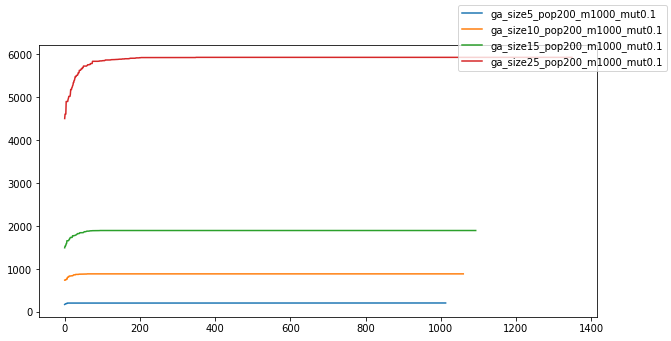

In [811]:
ga = Experiment.pickle_load(os.path.join(mlr_data, exp,pickle+'ga.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',15))
s.filters.append(TagFilter('mut',0.1))
s.filters.append(TagFilter('m', 1000))
s.filters.append(TagFilter('pop',200))
graph_generate_single(ga, search=s)
table_summary_single(ga, search=s)

best = Search()
# best.filters.append(TagFilter('size',15))
best.filters.append(TagFilter('mut',0.1))
best.filters.append(TagFilter('pop',200))
best.filters.append(TagFilter('m', 1000))
# best.filters.append(TagFilter('size', ))
to_chart['ga'] = best.findall(ga)

mim_size5_pop200_m1000_kp0.25|best_fit:210.0|best_it:4|time_to_best:0.08821|fevals_to_best:1209.0|fevals:202209.0
mim_size10_pop200_m1000_kp0.25|best_fit:845.0|best_it:11|time_to_best:0.66303|fevals_to_best:2621.0|fevals:203621.0
mim_size15_pop200_m1000_kp0.25|best_fit:1737.0|best_it:14|time_to_best:1.68534|fevals_to_best:3226.0|fevals:204226.0
mim_size25_pop200_m1000_kp0.25|best_fit:5197.0|best_it:13|time_to_best:4.08633|fevals_to_best:3026.0|fevals:204026.0


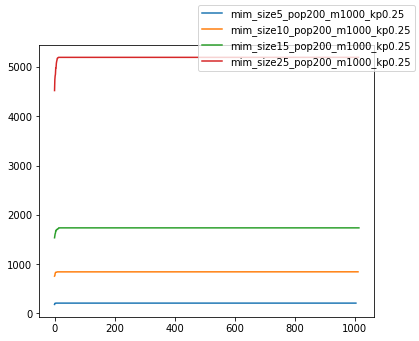

In [821]:
mim = Experiment.pickle_load(os.path.join(mlr_data, exp,pickle+'mim.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',15))
s.filters.append(TagFilter('m',1000))
graph_generate_single(mim, search=s)
table_summary_single(mim, search=s)

best = Search()

best.filters.append(TagFilter('m', 1000))
# best.filters.append(TagFilter('size', ))
to_chart['mim'] = best.findall(mim)

rhc_size5_r10_m1000|best_fit:208.0|best_it:59|time_to_best:0.9006|fevals_to_best:3123.0|fevals:4123.0
rhc_size10_r10_m1000|best_fit:783.0|best_it:54|time_to_best:1.02349|fevals_to_best:3606.0|fevals:4606.0
rhc_size15_r10_m1000|best_fit:1598.0|best_it:101|time_to_best:2.71171|fevals_to_best:11585.0|fevals:12585.0
rhc_size25_r10_m1000|best_fit:4669.0|best_it:293|time_to_best:4.63091|fevals_to_best:7704.0|fevals:8704.0


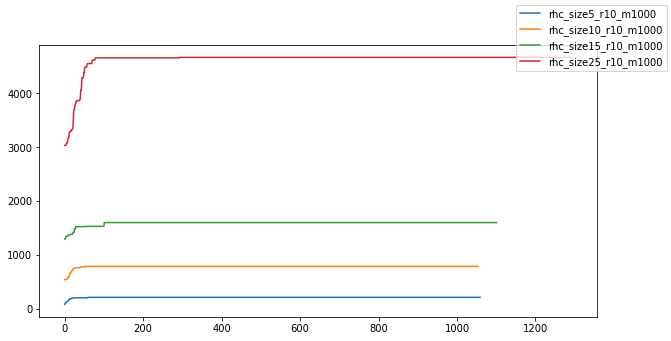

In [813]:
rhc = Experiment.pickle_load(os.path.join(mlr_data, exp,pickle+'rhc.p'))
#graph it. 
s = Search()
# s.filters.append(TagFilter('size',15))
s.filters.append(TagFilter('r',10))
s.filters.append(TagFilter('m',1000))
# s.filters.append(TagFilter('pop',100))
graph_generate_single(rhc, search=s)
table_summary_single(rhc, search=s)

best = Search()
best.filters.append(TagFilter('r',10))
best.filters.append(TagFilter('m', 1000))
# best.filters.append(TagFilter('size', ))
to_chart['rhc'] = best.findall(rhc)

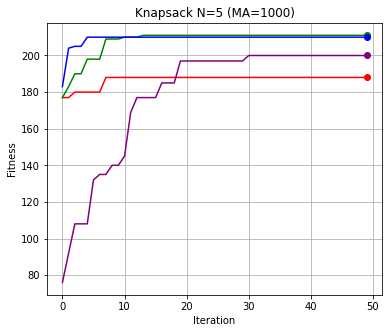

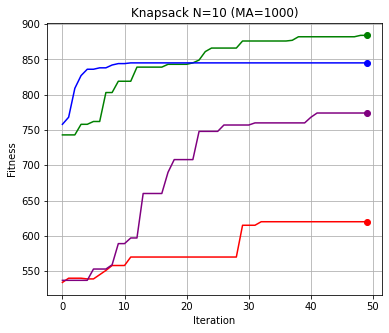

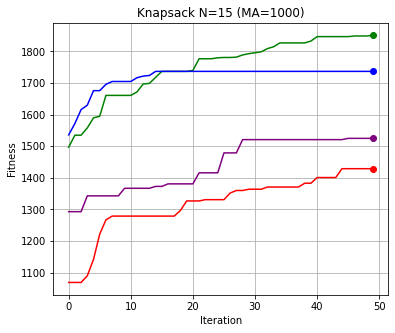

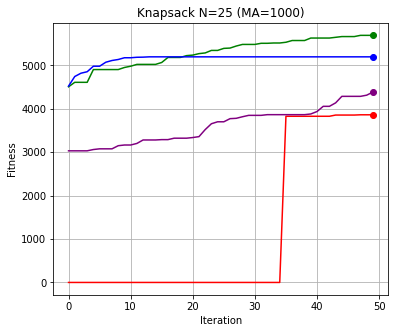

In [820]:
plt.rcParams["figure.figsize"] = (6,5)
for n in [5,10,15, 25]:
    graph_generate_summary(to_chart, f'Knapsack N={n} (MA=1000)','Iteration','Fitness', size=n, max_x=50)

[5, 10, 15, 25]
{'sa': {}, 'ga': {}, 'rhc': {}, 'mim': {}}


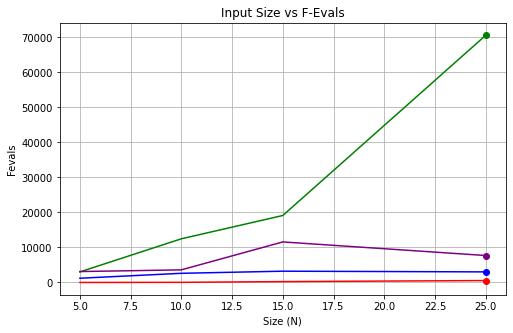

In [852]:

graph_generate_input_to_fevals(to_chart,'Input Size vs F-Evals','Size (N)','Fevals')

In [392]:
'''
░█████╗░███╗░░██╗███████╗  ███╗░░░███╗░█████╗░██╗░░██╗
██╔══██╗████╗░██║██╔════╝  ████╗░████║██╔══██╗╚██╗██╔╝
██║░░██║██╔██╗██║█████╗░░  ██╔████╔██║███████║░╚███╔╝░
██║░░██║██║╚████║██╔══╝░░  ██║╚██╔╝██║██╔══██║░██╔██╗░
╚█████╔╝██║░╚███║███████╗  ██║░╚═╝░██║██║░░██║██╔╝╚██╗
░╚════╝░╚═╝░░╚══╝╚══════╝  ╚═╝░░░░░╚═╝╚═╝░░╚═╝╚═╝░░╚═╝
'''
!ls $mlr_src/onemax
!ls $mlr_data/onemax
to_chart = {}
sa = Experiment.pickle_load(os.path.join(mlr_data, 'onemax','pickle_sa.p'))
ga = Experiment.pickle_load(os.path.join(mlr_data, 'onemax','pickle_ga.p'))
mim = Experiment.pickle_load(os.path.join(mlr_data, 'onemax','pickle_mim.p'))
rhc = Experiment.pickle_load(os.path.join(mlr_data, 'onemax','pickle_rhc.p'))

__pycache__  run.py
pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


In [346]:
'''
███╗░░██╗  ░██████╗░██╗░░░██╗███████╗███████╗███╗░░██╗░██████╗
████╗░██║  ██╔═══██╗██║░░░██║██╔════╝██╔════╝████╗░██║██╔════╝
██╔██╗██║  ██║██╗██║██║░░░██║█████╗░░█████╗░░██╔██╗██║╚█████╗░
██║╚████║  ╚██████╔╝██║░░░██║██╔══╝░░██╔══╝░░██║╚████║░╚═══██╗
██║░╚███║  ░╚═██╔═╝░╚██████╔╝███████╗███████╗██║░╚███║██████╔╝
╚═╝░░╚══╝  ░░░╚═╝░░░░╚═════╝░╚══════╝╚══════╝╚═╝░░╚══╝╚═════╝░
'''

!ls $mlr_src/nqueens
!ls $mlr_data/nqueens
exp = 'nqueens'
sa = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_sa.p'))
ga = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_ga.p'))
mim = Experiment.pickle_load(os.path.join(mlr_data, 'nqueens','pickle_mim.p'))
rhc = Experiment.pickle_load(os.path.join(mlr_data, 'nqueens','pickle_rhc.p'))

__pycache__  run.py
pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


In [25]:
'''
██╗░░██╗  ░█████╗░░█████╗░██╗░░░░░░█████╗░██████╗░
██║░██╔╝  ██╔══██╗██╔══██╗██║░░░░░██╔══██╗██╔══██╗
█████═╝░  ██║░░╚═╝██║░░██║██║░░░░░██║░░██║██████╔╝
██╔═██╗░  ██║░░██╗██║░░██║██║░░░░░██║░░██║██╔══██╗
██║░╚██╗  ╚█████╔╝╚█████╔╝███████╗╚█████╔╝██║░░██║
╚═╝░░╚═╝  ░╚════╝░░╚════╝░╚══════╝░╚════╝░╚═╝░░╚═╝
'''

!ls $mlr_src/kcolors
!ls $mlr_data/kcolors
sa = Experiment.pickle_load(os.path.join(mlr_data, 'kcolors','pickle_sa.p'))
ga = Experiment.pickle_load(os.path.join(mlr_data, 'kcolors','pickle_ga.p'))
mim = Experiment.pickle_load(os.path.join(mlr_data, 'kcolors','pickle_mim.p'))
rhc = Experiment.pickle_load(os.path.join(mlr_data, 'kcolors','pickle_rhc.p'))

__pycache__  run.py
pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p


In [739]:
'''

░█████╗░░░░░░░██████╗░███████╗░█████╗░██╗░░██╗░██████╗
██╔══██╗░░░░░░██╔══██╗██╔════╝██╔══██╗██║░██╔╝██╔════╝
██║░░╚═╝█████╗██████╔╝█████╗░░███████║█████═╝░╚█████╗░
██║░░██╗╚════╝██╔═══╝░██╔══╝░░██╔══██║██╔═██╗░░╚═══██╗
╚█████╔╝░░░░░░██║░░░░░███████╗██║░░██║██║░╚██╗██████╔╝
░╚════╝░░░░░░░╚═╝░░░░░╚══════╝╚═╝░░╚═╝╚═╝░░╚═╝╚═════╝░
'''
exp='cpeaks'
!ls $mlr_data/$exp
sa = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_sa.p'))
ga = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_ga.p'))
mim = Experiment.pickle_load(os.path.join(mlr_data, exp,'pickle_mim.p'))


pickle_ga.p  pickle_mim.p  pickle_rhc.p  pickle_sa.p
